In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
# Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# Clasification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score
# Best_searches
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Standarization
from sklearn.preprocessing import StandardScaler

from keras import models
from keras.layers import Dense

In [2]:
df_train = pd.read_csv('data/train.csv', encoding='utf8')
df_test = pd.read_csv('data/test.csv', encoding='utf8')
df_final = pd.read_csv('data/sample_submission.csv', encoding='utf8')

In [3]:
# First look on data
df_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
df_train.shape

(74051, 10)

In [5]:
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [6]:
df_test.shape

(49368, 9)

In [7]:
# Dataset shape
print(df_train.shape, "\n") # (74051, 10)

# Get fimiliar with Dtypes of dataset
df_train.info() # data-type is correct - Expect Sex

# Find out any Null values
df_train.isnull().sum() # 0 null values

(74051, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [8]:
# Get fimiliar with dataset outliers and varaibles range
df_train.describe(include='all')

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,27084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37025.000000,NaN,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,NaN,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,NaN,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,NaN,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,NaN,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,NaN,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000


## Variable Handling and feature_engineering

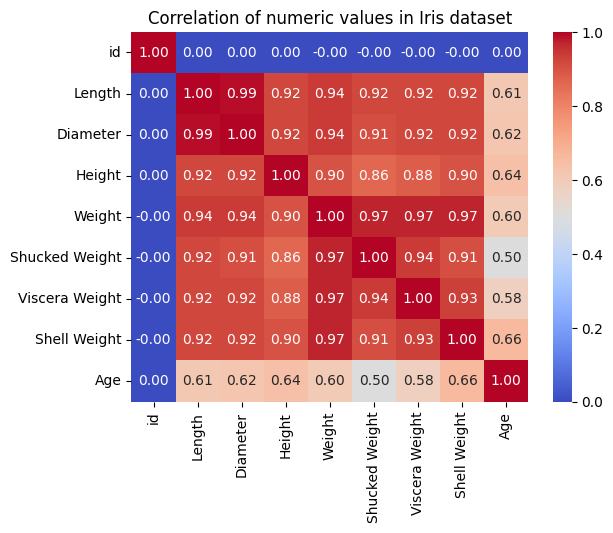

In [9]:
# Base corelation without feature engineering.
corr = df_train.corr(numeric_only=True)
corr = corr.round(2)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')

plt.title('Correlation of numeric values in Iris dataset')

plt.savefig('Correlogram_sns.png')

In [10]:
# Handle Sex Variable
df_train.groupby('Sex')['Age'].median()
df_train.groupby('Sex')['Age'].mean()

Sex
F    11.341547
I     7.599073
M    10.895953
Name: Age, dtype: float64

In [11]:
dict_sex = {
    'M': 7.6,
    'I': 10.9,
    'F': 11.3
             }

df_train['Sex'] = df_train['Sex'].map(dict_sex)
df_test['Sex'] = df_test['Sex'].map(dict_sex)

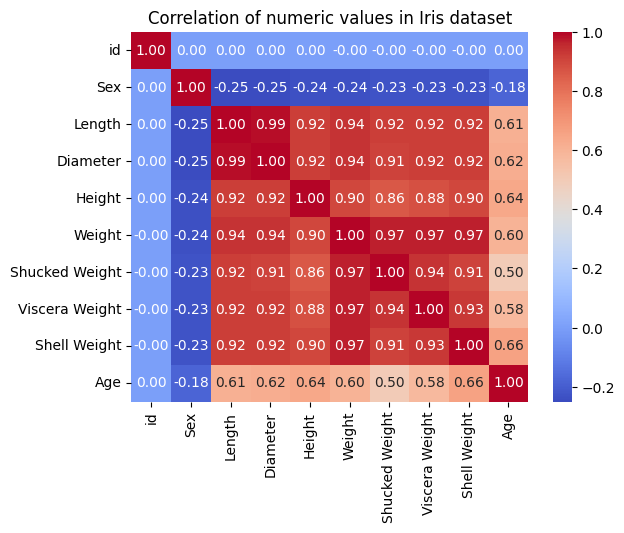

In [12]:
corr = df_train.corr()
corr = corr.round(2)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')

plt.title('Correlation of numeric values in Iris dataset')

plt.savefig('Correlogram_sns.png')

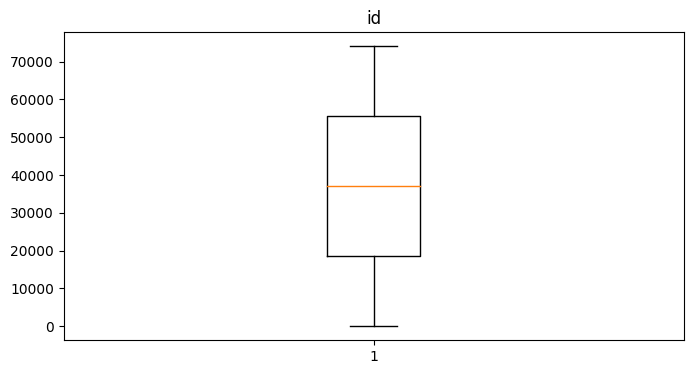

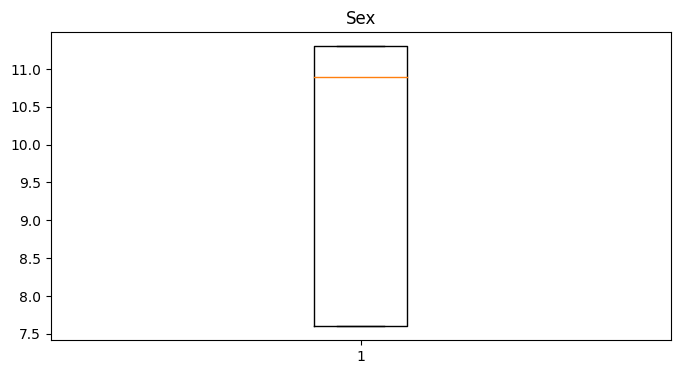

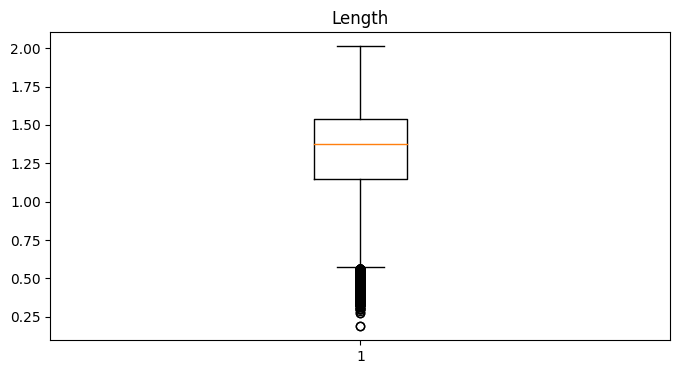

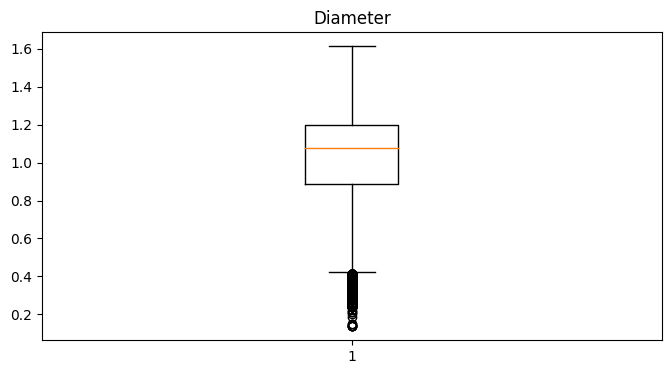

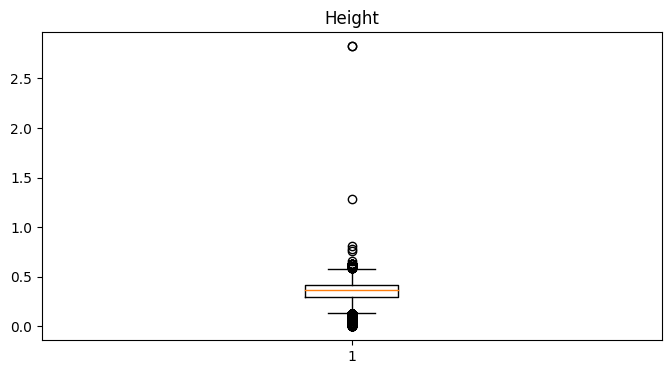

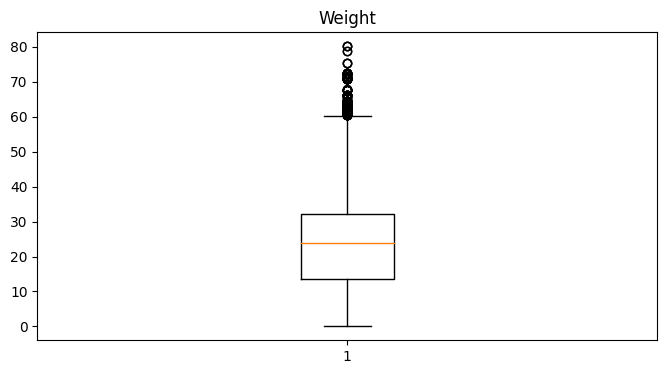

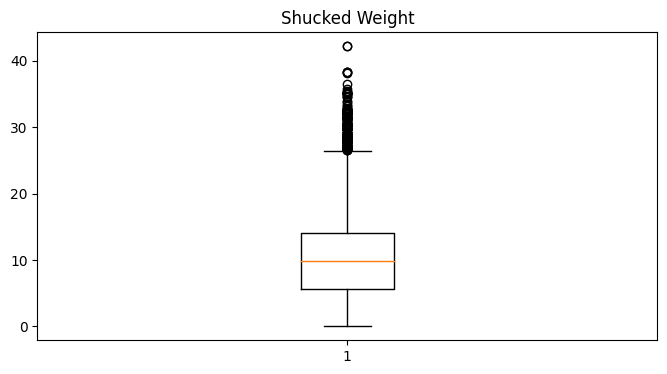

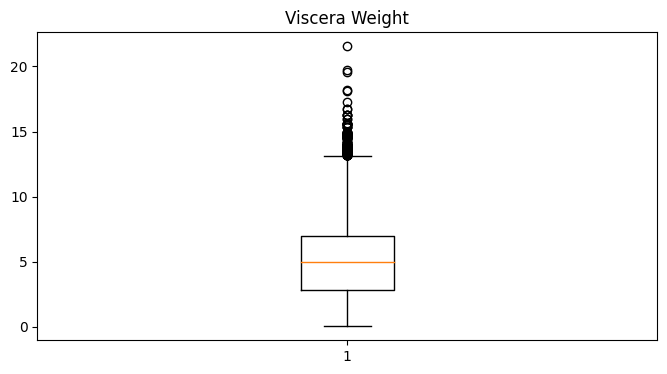

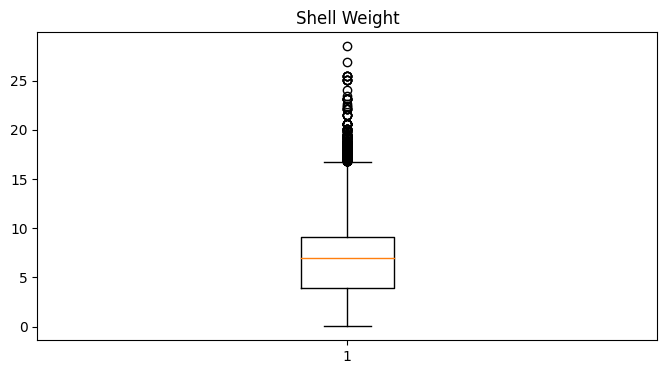

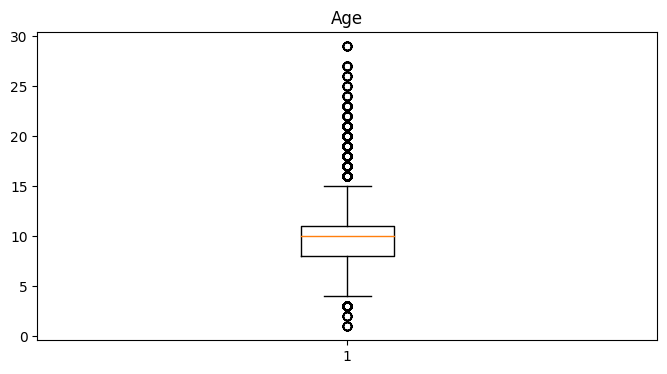

In [13]:
# Chosing the columns for withch to plot outliers 
columns_to_plot = df_train.columns

# Box-plot creation for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))  # Size of plot
    plt.boxplot(df_train[column])  # Boxpltot
    plt.title(column)  # Title of plot
    plt.show()

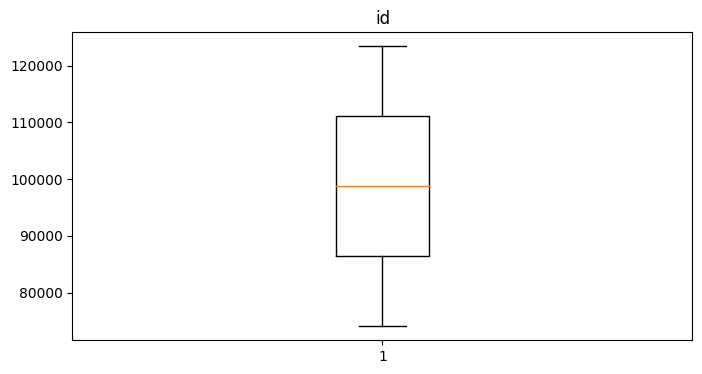

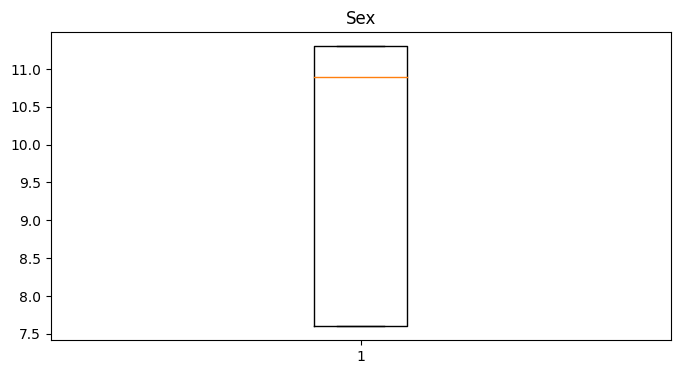

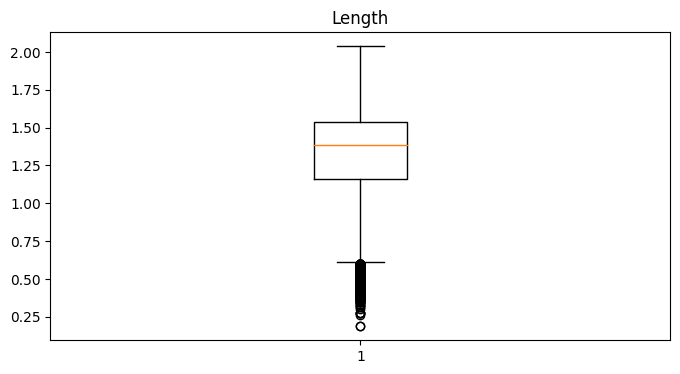

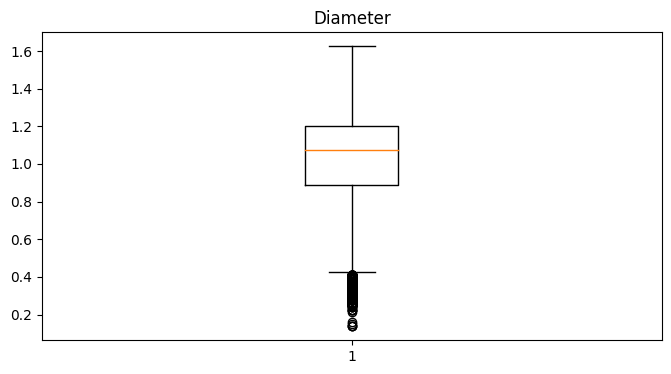

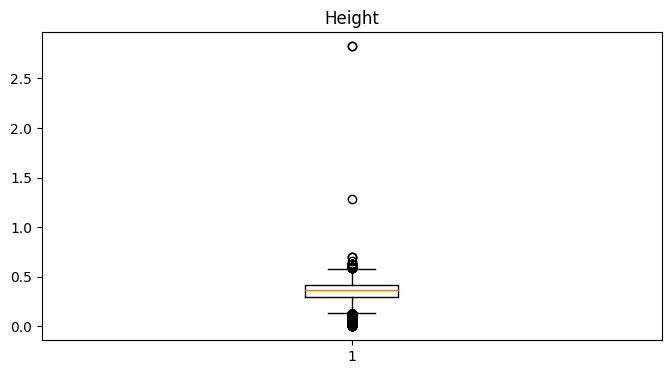

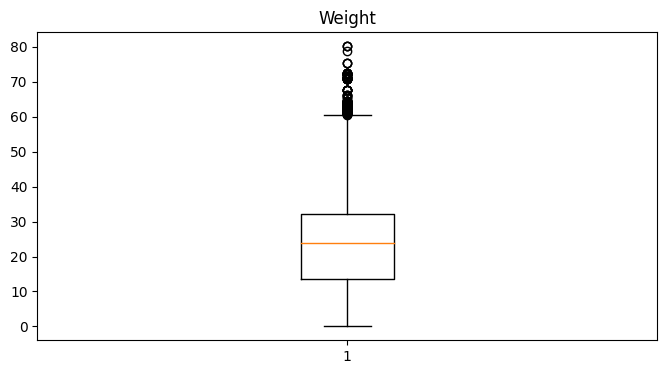

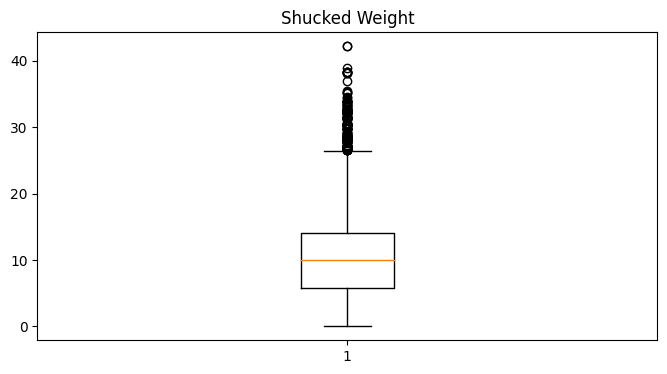

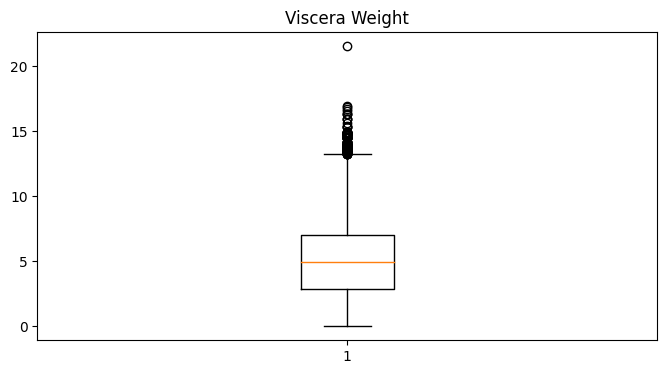

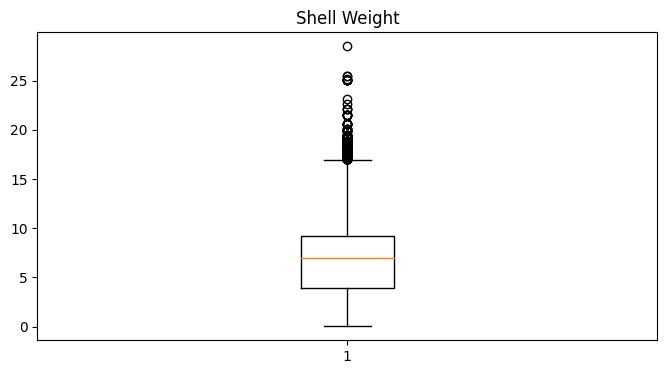

In [14]:
# Chosing the columns for withch to plot outliers 
columns_to_plot = df_test.columns

# Box-plot creation for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))  # Size of plot
    plt.boxplot(df_test[column])  # Boxpltot
    plt.title(column)  # Title of plot
    plt.show()

In [15]:
# DIAMETER / LENGTH

## Possible feature enigneering 

In [16]:
df_train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [17]:
df_test.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [18]:
# columns_with_outliers_df_train = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
#        'Viscera Weight', 'Shell Weight']

What is outlier? 

'Length', 
'Diameter', 
'Height', 
'Weight', 
'Shucked Weight',
'Viscera Weight', 
'Shell Weight'

In [19]:
# id_length_outliers = df[df['Length'] < 0.75]['id']

In [20]:
# df[df['Length'] < 0.75]['Age'].mean()

In [21]:
# df[df['Length'] < 0.75]['Age']

In [22]:
# id_diameter_outlers = df[df['Diameter'] < 0.6]['id']

In [23]:
# df[df['Diameter'] < 0.6]['Age'].mean()

In [24]:
# df['Age'].mean()

### Removing Outliers!

In [25]:
# Q1 = df_train.quantile(0.25)
# Q3 = df_train.quantile(0.75)
# IQR = Q3 - Q1

# # Define the upper and lower bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = ((df_train < lower_bound) | (df_train > upper_bound)).any(axis=1)

# # Remove outliers from the DataFrame
# df_no_outliers = df_train[~outliers]

In [26]:
# df_no_outliers.shape

In [27]:
# df_train = df_no_outliers

In [28]:
# print(len(id_length_outliers))
# print(len(id_diameter_outlers))
# print(len(set(id_diameter_outlers + id_length_outliers)))
# print(len(np.intersect1d(id_diameter_outlers, id_length_outliers)))

In [29]:
df_train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [30]:
# Creation

In [31]:
numerical_cols = ['Length', 'Diameter', 'Height', 'Weight', 
                  'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Sex']

In [32]:
scaler = StandardScaler()

df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

In [33]:
df_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,0.640141,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,9
1,1,0.640141,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788,8
2,2,-1.311011,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224,9
3,3,0.876644,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,11
4,4,0.640141,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955,8


In [34]:
df_train.describe()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,7.405100e+04,7.405100e+04,7.405100e+04,7.405100e+04,7.405100e+04,7.405100e+04,7.405100e+04,7.405100e+04,74051.000000
mean,37025.000000,-7.593253e-16,-2.426655e-16,-3.259769e-16,1.399117e-16,2.424856e-16,1.116655e-17,-1.129009e-16,-5.760788e-17,9.967806
std,21376.826729,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,3.175189
min,0.000000,-1.311011e+00,-3.926810e+00,-3.736377e+00,-3.782211e+00,-1.844433e+00,-1.793511e+00,-1.796055e+00,-1.864034e+00,1.000000
25%,18512.500000,-1.311011e+00,-5.819530e-01,-5.770814e-01,-5.225224e-01,-7.864880e-01,-7.817471e-01,-7.860059e-01,-7.686029e-01,8.000000
50%,37025.000000,6.401406e-01,1.999617e-01,2.127426e-01,1.565793e-01,3.274716e-02,-3.490921e-02,-2.466207e-02,5.791364e-02,10.000000
75%,55537.500000,8.766438e-01,7.646778e-01,7.392919e-01,6.998607e-01,6.939630e-01,6.993132e-01,6.910012e-01,6.550619e-01,11.000000
max,74050.000000,8.766438e-01,2.416480e+00,2.476905e+00,2.691319e+01,4.484187e+00,5.710192e+00,5.903669e+00,6.072897e+00,29.000000


In [35]:
y = df_train['Age']

df_train.drop(labels=['Age'], inplace=True, axis=1)

X = df_train

In [36]:
X.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,0.640141,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376
1,1,0.640141,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788
2,2,-1.311011,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224
3,3,0.876644,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095
4,4,0.640141,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955


In [37]:
y.head()

0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64

In [38]:
df_train.shape

(74051, 9)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Neural network

### Keras neural network

In [47]:
model = models.Sequential()
model.add(Dense(256, activation="relu", input_shape=(X.shape[1],)))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mean_absolute_error"])

model.fit(X_train, y_train, batch_size=256, epochs=100)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print('MSE train: ', mean_absolute_error(y_train, y_pred_train))
print('MSE: ', mean_absolute_error(y_test, y_pred))

Epoch 1/100
217/217 [==============================] - 1s 2ms/step - loss: 9.8620 - mean_squared_error: 107.3175
Epoch 2/100
217/217 [==============================] - 0s 2ms/step - loss: 9.6450 - mean_squared_error: 103.0809
Epoch 3/100
217/217 [==============================] - 0s 2ms/step - loss: 9.4281 - mean_squared_error: 98.9447
Epoch 4/100
217/217 [==============================] - 0s 2ms/step - loss: 9.2111 - mean_squared_error: 94.8983
Epoch 5/100
217/217 [==============================] - 0s 2ms/step - loss: 8.9941 - mean_squared_error: 90.9490
Epoch 6/100
217/217 [==============================] - 0s 2ms/step - loss: 8.7772 - mean_squared_error: 87.0917
Epoch 7/100
217/217 [==============================] - 0s 2ms/step - loss: 8.5603 - mean_squared_error: 83.3324
Epoch 8/100
217/217 [==============================] - 1s 2ms/step - loss: 8.3434 - mean_squared_error: 79.6637
Epoch 9/100
217/217 [==============================] - 0s 2ms/step - loss: 8.1265 - mean_squared_error

In [ ]:
# model = models.Sequential()

# model.add(Dense(128, activation="relu", input_shape=(X.shape[1],)))
# model.add(Dense(12, activation = "relu"))
# model.add(Dense(24, activation = "relu"))
# model.add(Dense(36, activation = "relu"))
# model.add(Dense(64, activation = "relu"))
# model.add(Dense(24, activation = "relu"))
# model.add(Dense(12, activation = "relu"))
# model.add(Dense(8, activation = "relu"))
# model.add(Dense(4, activation = "relu"))
# model.add(Dense(units = 1)) 
# model.compile(
#     optimizer="adam",
#     loss="mean_absolute_error",
#     metrics=["mean_absolute_error"]
# )

# model.fit(X_train, y_train, batch_size=256, epochs=100)

# y_pred_train = model.predict(X_train)
# y_pred = model.predict(X_test)

# print('MSE train: ', mean_absolute_error(y_train, y_pred_train))
# print('MSE: ', mean_absolute_error(y_test, y_pred))

In [ ]:
# # Define the hyperparameter grid
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
#     'batch_size': [32, 64, 128],
#     'max_iter': [300, 500, 1000],
#     'solver': ['adam', 'sgd']
# }

# # Create the MLPClassifier
# model = MLPRe()

# # Perform grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X, y)

# # Print the best parameters and score
# print("Best Parameters: ", grid_result.best_params_)
# # print("Best Score: ", grid_result.best_score_)

In [ ]:
# reg_model = MLPRegressor(
#     hidden_layer_sizes=(),
#     activation='relu',
#     solver='adam',
#     max_iter=2000,
#     batch_size=64,
#     random_state=42
# )

# reg_model.fit(X_train, y_train)
# y_pred = reg_model.predict(X_test)

# print(r2_score(y_test, y_pred))

In [ ]:
# Define the parameter grid for grid search
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(1, 70, 7),
    'min_samples_leaf': (1, 70, 7),
    'min_samples_split':(1, 70, 7),
    'max_features': ['sqrt', 'log2']}

# Create the Random Forest regressor
rf = RandomForestRegressor()

# Create the randomized search object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, n_iter=10)

# Perform randomized search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
best_rf = random_search.best_estimator_
print('Best Params: ', random_search.best_params_)

# Fit the best estimator on the training data
best_rf.fit(X_train, y_train)

# Predict on the training and test data using the best estimator
y_pred_train = best_rf.predict(X_train)
y_pred = best_rf.predict(X_test)

# Calculate the evaluation metrics

print('Training Set Metrics:')
print('f1_score:', (y_train, y_pred_train, average='weighted'))
print('precision_score:', precision_score(y_train, y_pred_train, average='weighted'))
print('accuracy_score:', accuracy_score(y_train, y_pred_train))

# Test set
print('Test Set Metrics:')
print('f1_score:', f1_score(y_test, y_pred, average='weighted'))
print('precision_score:', precision_score(y_test, y_pred, average='weighted'))
print('accuracy_score:', accuracy_score(y_test, y_pred))

In [ ]:
print('Training Set Metrics:')
print('r2:', r2_score(y_train, y_pred_train))
print('mae:', mean_absolute_error(y_train, y_pred_train))
print('rmse:', mean_squared_error(y_train, y_pred_train))

# Test set
print('Test Set Metrics:')
print('r2:', r2_score(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))
print('rmse:', mean_squared_error(y_test, y_pred))

## Random Forest Classifier with Randomized Search
### Note: Very bad results with RF_CLassifier

Training Set Metrics: <br>
f1_score: 0.42094732513047434 <br>
precision_score: 0.47015912282841577 <br>
accuracy_score: 0.44934999459829306 <br>
Test Set Metrics: <br>
f1_score: 0.30455725835328634 <br>
precision_score: 0.3035991012714197 <br>
accuracy_score: 0.3298222870415384 <br>

In [ ]:
# Clasification is going really bad for this data 

# # Define the parameter grid for grid search
# param_dist = {
#     'n_estimators': np.arange(100, 500, 100),
#     'max_depth': np.arange(1, 70, 7),
#     'min_samples_leaf': (1, 70, 7),
#     'min_samples_split':(1, 70, 7),
#     'max_features': ['sqrt', 'log2']}

# # Create the Random Forest regressor
# rf = RandomForestClassifier()

# # Create the randomized search object
# random_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, n_iter=15)

# # Perform randomized search on the training data
# random_search.fit(X_train, y_train)

# # Get the best estimator and its corresponding parameters
# best_rf = random_search.best_estimator_
# print('Best Params: ', random_search.best_params_)

# # Fit the best estimator on the training data
# best_rf.fit(X_train, y_train)

# # Predict on the training and test data using the best estimator
# y_pred_train = best_rf.predict(X_train)
# y_pred = best_rf.predict(X_test)

# # Calculate the evaluation metrics

# # Training set
# print('Training Set Metrics:')
# print('f1_score:', f1_score(y_train, y_pred_train, average='weighted'))
# print('precision_score:', precision_score(y_train, y_pred_train, average='weighted'))
# print('accuracy_score:', accuracy_score(y_train, y_pred_train))

# # Test set
# print('Test Set Metrics:')
# print('f1_score:', f1_score(y_test, y_pred, average='weighted'))
# print('precision_score:', precision_score(y_test, y_pred, average='weighted'))
# print('accuracy_score:', accuracy_score(y_test, y_pred))

## Random Forest Regressor with Randomized Search

In [ ]:
# # Define the parameter grid for grid search
# param_dist = {
#     'n_estimators': np.arange(100, 500, 100),
#     'max_depth': np.arange(1, 70, 7),
#     'min_samples_leaf': (1, 70, 7),
#     'min_samples_split':(1, 70, 7),
#     'max_features': ['sqrt', 'log2']}

# # Create the Random Forest regressor
# rf = RandomForestRegressor()

# # Create the randomized search object
# random_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, n_iter=15)

# # Perform randomized search on the training data
# random_search.fit(X_train, y_train)

# # Get the best estimator and its corresponding parameters
# best_rf = random_search.best_estimator_
# print('Best Params: ', random_search.best_params_)

# # Fit the best estimator on the training data
# best_rf.fit(X_train, y_train)

# # Predict on the training and test data using the best estimator
# y_pred_train = best_rf.predict(X_train)
# y_pred = best_rf.predict(X_test)

# # Calculate the evaluation metrics

# # Training set
# print('Training Set Metrics:')
# print('MAE:', mean_absolute_error(y_train, y_pred_train))
# print('RMSE:', mean_squared_error(y_train, y_pred_train))
# print('R2:', r2_score(y_train, y_pred_train))

# # Test set
# print('Test Set Metrics:')
# print('MAE:', mean_absolute_error(y_test, y_pred))
# print('RMSE:', mean_squared_error(y_test, y_pred))
# print('R2:', r2_score(y_test, y_pred))

## Best scores on train_test

### Random Forest Regressor

Best Params:  <Br> 
{'n_estimators': 200, 'min_samples_split': 70, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 22} <Br> 
Training Set Metrics: <Br> 
MAE: 1.3186759767733662 <Br> 
RMSE: 3.667818781824295 <Br> 
R2: 0.6351240884233136 <Br> 
Test Set Metrics: <Br> 
MAE: 1.4322469031663596 <Br> 
RMSE: 4.264537771944838 <Br> 
R2: 0.5806744531004705 <Br> 

## Final model

In [48]:
#Scaller
scaler = StandardScaler()

df_test[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])

In [49]:
X_final = df_test

In [50]:
X_final.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,0.635001,-0.940227,-1.115249,-0.798762,-1.174409,-1.153502,-1.197655,-1.125492
1,74052,0.635001,-0.548169,-0.586910,-0.798762,-0.629467,-0.552334,-0.654334,-0.776635
2,74053,0.871805,-0.112548,-0.164238,-0.256807,-0.703471,-0.815029,-0.425835,-0.538778
3,74054,0.871805,0.802256,-0.164238,0.420637,0.388656,0.579278,0.528784,0.079651
4,74055,0.635001,-0.722417,-0.745411,-0.934251,-0.925485,-0.820081,-0.933611,-0.955027


In [51]:
# X_final.drop(labels=['id'], inplace=True, axis=1)

In [52]:
X_final.shape

(49368, 9)

In [53]:
y_pred_to_kaggle = model.predict(X_final)

1543/1543 [==============================] - 1s 351us/step


In [54]:
df_final['Age'] = y_pred_to_kaggle

In [55]:
df_final.head()

,id,Age
0,74051,9.999546
1,74052,9.999546
2,74053,9.999546
3,74054,9.999546
4,74055,9.999546


## Submission Creation

In [59]:
df_final['Age'] = np.where(
    np.abs(df_final['Age'] - df_final['Age'].round()) < 0.49,
    df_final['Age'].round(),
    df_final['Age']
)

In [60]:
df_final.head()

,id,Age
0,74051,10.0
1,74052,10.0
2,74053,10.0
3,74054,10.0
4,74055,10.0


In [61]:
df_final.to_csv('submission-tries/final_try.csv', index=False)